# DECISION TREE

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#If using the pythong interpretor, omit this first line.  It only applies to the Jupyter environment
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id + ".png", format='png', dpi=300)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
#TRAINING: 
tree_clf.fit(X, y)
#70/30

DecisionTreeClassifier(max_depth=2, random_state=42)

In [38]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True)

In [1]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")#yellow
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")#blue
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica") #green
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

    plt.figure(figsize=(8, 4))
    plot_decision_boundary(tree_clf, X, y)
    plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
    plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
    plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
    plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
    plt.text(1.40, 1.0, "Depth=0", fontsize=15)
    plt.text(3.2, 1.80, "Depth=1", fontsize=13)
    plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
    #save_fig("decision_tree_decision_boundaries_plot")
    plt.show()

In [23]:
tree_clf.predict_proba([[5, 1.5]])
tree_clf.predict([[5, 1.5]])

array([1])

In [24]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # view the example that is the widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [25]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2) #find indices of examples that are not the max width
X_tweaked = X[not_widest_versicolor] #create a training set with the widest petals removed
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40) #Retrain
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

C:\Users\Yumil\AppData\Local\Temp/ipykernel_28780/281873304.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)


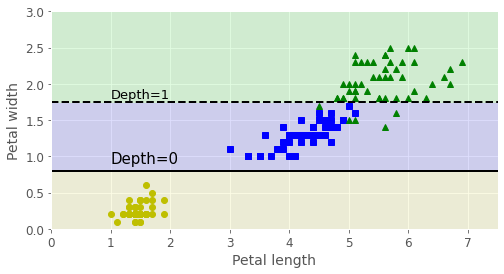

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

#save_fig("decision_tree_instability_plot")
plt.show()